In [2]:
# import necessary packages
import os
import matplotlib.pyplot as plt
import geopandas as gpd
from descartes import PolygonPatch
import pandas as pd
import numpy as np
import seaborn as sns
import cbsodata
from mpl_toolkits.mplot3d import axes3d

In [8]:
buurten = gpd.read_file("data/neighborhoods/buurten.shp")
stations = gpd.read_file("data/ovhaltes/ovhaltes.shp")

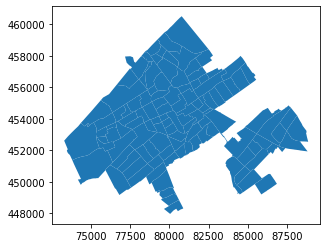

In [7]:
buurten.plot()

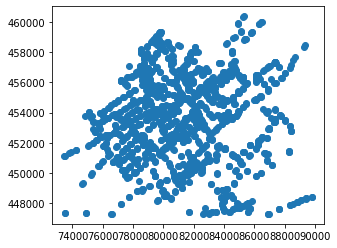

In [9]:
stations.plot()

In [10]:
dfsjoin = gpd.sjoin(buurten,stations)

In [14]:
dfpivot = pd.pivot_table(dfsjoin,index='BUURTCODE',columns='TYPE',aggfunc={'TYPE':len})

In [20]:
dfpivot.columns = dfpivot.columns.droplevel()

In [22]:
dfpolynew = buurten.merge(dfpivot, how='left',on='BUURTCODE')

In [33]:
dfpolynew["bus_m"] = dfpolynew["bus"] / dfpolynew["OPPERVLAKT"] * 1000000
dfpolynew["bus_m"] = dfpolynew["bus_m"].fillna(0)
dfpolynew["trein_m"] = dfpolynew["trein"] / dfpolynew["OPPERVLAKT"] * 1000000
dfpolynew["trein_m"] = dfpolynew["trein_m"].fillna(0)
dfpolynew["metro_m"] = dfpolynew["metro"] / dfpolynew["OPPERVLAKT"] * 1000000
dfpolynew["metro_m"] = dfpolynew["metro_m"].fillna(0)
dfpolynew["tram_m"] = dfpolynew["tram"] / dfpolynew["OPPERVLAKT"] * 1000000
dfpolynew["tram_m"] = dfpolynew["tram_m"].fillna(0)
dfpolynew["total_m"] = dfpolynew["bus_m"] + dfpolynew["trein_m"] + dfpolynew["metro_m"] + dfpolynew["tram_m"]

In [35]:
dfpolynew.columns

Index(['WIJKBUURTC', 'BUURTCODE', 'BUURTNAAM', 'WIJKCODE', 'OCE_ID',
       'OPPERVLAKT', 'OMTREK', 'geometry', 'bus', 'metro', 'tram', 'trein',
       'bus_m', 'trein_m', 'metro_m', 'tram_m', 'total_m'],
      dtype='object')

In [38]:
df_short = dfpolynew[['BUURTCODE', 'BUURTNAAM','bus_m', 'trein_m', 'metro_m', 'tram_m', 'total_m']].set_index("BUURTCODE")

In [40]:
#The resulting dataset is a list of public transport stations per square kilometer of area for each of the buurten.
df_short

,BUURTNAAM,bus_m,trein_m,metro_m,tram_m,total_m
BUURTCODE,,,,,,
108,Bosweide,6.787281,0.000000,0.0,2.714912,9.502193
109,Tedingerbroek,0.000000,0.000000,0.0,0.000000,0.000000
110,De Reef,1.610498,0.000000,0.0,0.000000,1.610498
104,Lage Veld,6.504751,0.000000,0.0,4.336501,10.841252
105,Zonne Veld,6.003846,0.000000,0.0,4.002564,10.006410
...,...,...,...,...,...,...
74,Duttendel,6.764639,0.000000,0.0,1.503253,8.267892
111,De Venen,14.139587,5.655835,0.0,5.655835,25.451256
112,Morgenweide,15.878187,0.000000,0.0,9.073250,24.951436


In [41]:
df_short.to_csv("output/ovstations.csv")

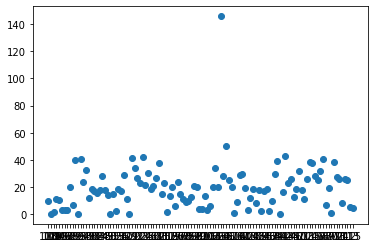

In [47]:
plt.plot(df_short["total_m"],"o")